<a href="https://colab.research.google.com/github/jinay780/python/blob/master/Air_pollutioprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=10,8

In [3]:
data=pd.read_csv('AirQualityUCI.csv')
data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,4/4/2005,10.00.00,3.1,1314,-200.0,13.5,1101,472,539,190,1374,1729.0,21.9,29.3,0.7568
9353,4/4/2005,11.00.00,2.4,1163,-200.0,11.4,1027,353,604,179,1264,1269.0,24.3,23.7,0.7119
9354,4/4/2005,12.00.00,2.4,1142,-200.0,12.4,1063,293,603,175,1241,1092.0,26.9,18.3,0.6406
9355,4/4/2005,13.00.00,2.1,1003,-200.0,9.5,961,235,702,156,1041,770.0,28.3,13.5,0.5139
9356,4/4/2005,14.00.00,2.2,1071,-200.0,11.9,1047,265,654,168,1129,816.0,28.5,13.1,0.5028


In [4]:
data = data.drop('Date', axis=1)
data = data.drop('Time', axis=1)
data = data.drop('C6H6(GT)', axis=1)

In [5]:
data.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               1
dtype: int64

In [6]:
data.AH=data.AH.fillna(data.AH.mean())

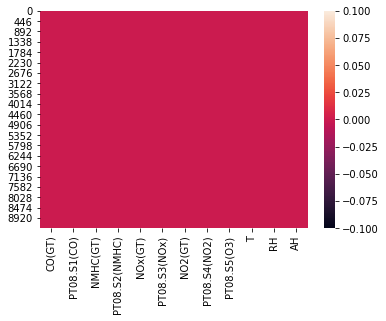

In [7]:
sns.heatmap(data.isnull())

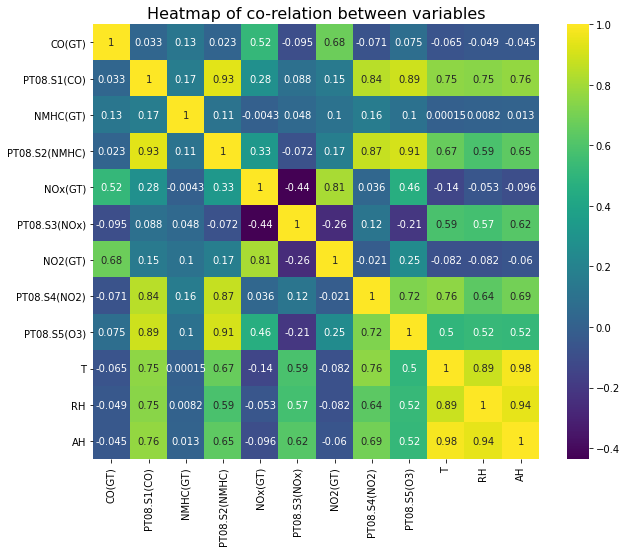

In [10]:
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

In [11]:
X=data.drop('RH',axis=1)
y=data['RH']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [14]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
pred=model.predict(X_test)
mse=mean_squared_error(y_test,pred)
print('RMSE',np.sqrt(mse))
print('Variance score:%.2f'% r2_score(y_test,pred))

RMSE 8.16257786557161
Variance score:0.98


In [26]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,criterion='mse')
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [27]:
pred=model.predict(X_test)
mse=mean_squared_error(y_test,pred)
print('RMSE',np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, pred))

print("Result :",model.score(X_train, y_train))

RMSE 0.680158270193996
Variance score: 1.00
Result : 0.9999178230534944


In [29]:
from sklearn.svm import SVR
model1=SVR()
model1.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [34]:
pred1=model1.predict(X_test)
mse=mean_squared_error(y_test,pred1)
print('RMSE',np.sqrt(mse))
print('Variance score : %.2f'% r2_score(y_test,pred))
print('Result:',model1.score(X_train,y_train))

RMSE 14.20537087087144
Variance score : 1.00
Result: 0.9204386031217097
